In [69]:
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
from math import sin, cos, sqrt, atan2, radians

import shapely
import pickle
import random
import numpy as np
import gmaps, os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from ipywidgets.embed import embed_minimal_html
import webbrowser
# The functions of Geoguessr class are loaded 
# from the geoLSTM.py file
import neural_network

# directory containing data
DATADIR = "/home/abp4h/Geoguessr_Project/data/"
DATACOMBINED = DATADIR + "ready_data/"
POLYDIR = "/home/abp4h/Geoguessr_Project/data/" 
# directory to store model in
MODELDIR = "/home/abp4h/Geoguessr_Project/data/models/"

In [71]:
# load training image file names
TF = np.load(DATADIR + 'ready_data/training_data.npy')
# load testing image file names
TESF = np.load(DATADIR +'ready_data/testing_data.npy')
print("Train files: {}, Test files: {}".format(TF.size, TESF.size))

Train files: 1, Test files: 1


65


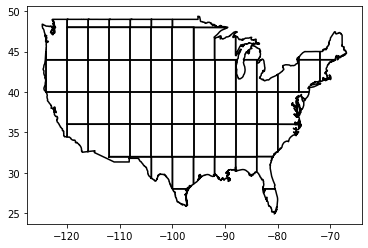

In [72]:
# load split grid file
usaPolyGrid = pickle.load(open(POLYDIR + "pickled_data/mainlandGrid.pickle",'rb'))
for i in usaPolyGrid.values():
    plt.plot(i[:,1],i[:,0], color='black')
print(len(usaPolyGrid))

In [73]:
neural_network = neural_network.Geoguessr(useRestnet=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_3 (TimeDist (None, 3, 2048)           23587712  
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                540928    
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

In [74]:
# modelName = '/restnet_5.738_19.h5'
modelName = tf.keras.applications.resnet50.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)
geoModel = modelName

In [75]:
geoModel.compile(
    optimizer="rmsprop",
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    
)
TF = np.asarray(TF)
geoModel.fit(TF, DATACOMBINED, batch_size=4, epochs=2, verbose=1)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'str'>

In [ ]:
geoModel.predictSingle(TESF[0], DATACOMBINED, ployGrid=usaPolyGrid)

In [ ]:
geoModel.evaluate(TESF, DATACOMBINED, usaPolyGrid)

In [ ]:
models = []
for i in os.listdir(MODELDIR):
    models.append(geoLSTM.Geoguessr.load(MODELDIR + '/' +i))

In [ ]:
trainableParams = []
avgDistanceError = []
for gm in models:
    trainableParams.append(sum([tf.keras.backend.count_params(i) for i in gm.model.trainable_weights]))
    avgDistanceError.append(gm.evaluate(TESF, DATACOMBINED, usaPolyGrid))

In [ ]:
plt.bar(np.arange(len(trainableParams)), height=avgDistanceError)
plt.xticks(np.arange(len(trainableParams)), trainableParams)
plt.xlabel("Trainabel paramers per model")
plt.ylabel("Average miles")
plt.title("Average miles per model")
plt.show()